**INTRODUCCION**

El presente proyecto tiene como objetivo analizar los factores que influyen en el rendimiento académico de los estudiantes en los exámenes, considerando tanto variables individuales como contextuales. El rendimiento escolar es un indicador clave del éxito educativo y está determinado por una variedad de elementos que incluyen hábitos de estudio, asistencia a clases, apoyo familiar, acceso a recursos educativos, y características escolares, entre otros.

Para comprender cómo estos factores impactan en las calificaciones, se emplean métodos estadísticos como el Análisis de Varianza (ANOVA) y el test de Tukey. Estas herramientas permiten identificar diferencias significativas entre grupos categorizados según variables como la participación parental, el nivel de motivación del estudiante, el acceso a internet, el ingreso familiar, y la calidad del profesorado. Asimismo, se analizan aspectos como la influencia de los compañeros, las actividades extracurriculares, y las condiciones socioeconómicas.

El análisis busca no solo evaluar las diferencias entre grupos, sino también generar información valiosa que permita diseñar estrategias pedagógicas y políticas educativas más efectivas. Al identificar patrones y relaciones clave, se pretende contribuir al desarrollo de soluciones que promuevan una educación más inclusiva y equitativa, mejorando así las oportunidades de éxito académico para todos los estudiantes.

In [2]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/Josselyn04/base-de-datos-pu4/refs/heads/main/dataset.1%20(1).csv")
df.dropna(inplace=True)
df

,horas_estudio,asistencia,participacion_parental,acceso_a_recursos,actividades_extracurriculares,horas_suenio,calificaciones_previas,nivel_motivacion,acceso_internet,sesiones_tutoria,ingreso_familiar,calidad_profesorado,tipo_escuela,influencia_companieros,actividad_fisica,discapacidad_aprendizaje,nivel_estudio_padres,distancia,genero,puntaje_examen
0,23,84,bajo,elevado,no,7,73,bajo,si,0,bajo,medio,publico,positivo,3,no,preparatoria,cercano,hombre,67
1,19,64,bajo,medio,no,8,59,bajo,si,2,medio,bajo,publico,negativo,4,no,universidad,moderado,mujer,61
2,24,98,medio,bajo,si,7,91,medio,si,2,medio,bajo,publico,neutral,4,no,posgrado,cercano,hombre,74
3,29,89,bajo,medio,si,8,98,medio,si,1,medio,bajo,publico,negativo,4,no,preparatoria,moderado,hombre,71
4,19,92,medio,bajo,si,6,65,medio,si,3,medio,elevado,publico,neutral,4,no,universidad,cercano,mujer,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,elevado,medio,no,7,76,medio,si,1,elevado,medio,publico,positivo,2,no,preparatoria,cercano,mujer,68
6603,23,76,elevado,medio,no,8,81,medio,si,3,bajo,elevado,publico,positivo,2,no,preparatoria,cercano,mujer,69
6604,20,90,medio,bajo,si,6,65,bajo,si,3,bajo,medio,publico,negativo,2,no,posgrado,cercano,mujer,68
6605,10,86,elevado,elevado,si,6,91,elevado,si,2,bajo,medio,privado,positivo,3,no,preparatoria,lejano,mujer,68


In [3]:
df['participacion_parental'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [4]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['participacion_parental'] == 'bajo']['puntaje_examen'],
    df[df['participacion_parental'] == 'medio']['puntaje_examen'],
    df[df['participacion_parental'] == 'elevado']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 80.46
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


Se usa la prueba ANOVA la cual muestra que hay una diferencia significativa en la participacion parental entre al menos dos prubas.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   bajo elevado   1.7334   0.0  1.4042  2.0626   True
   bajo   medio   0.7344   0.0  0.4363  1.0326   True
elevado   medio   -0.999   0.0 -1.2636 -0.7344   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

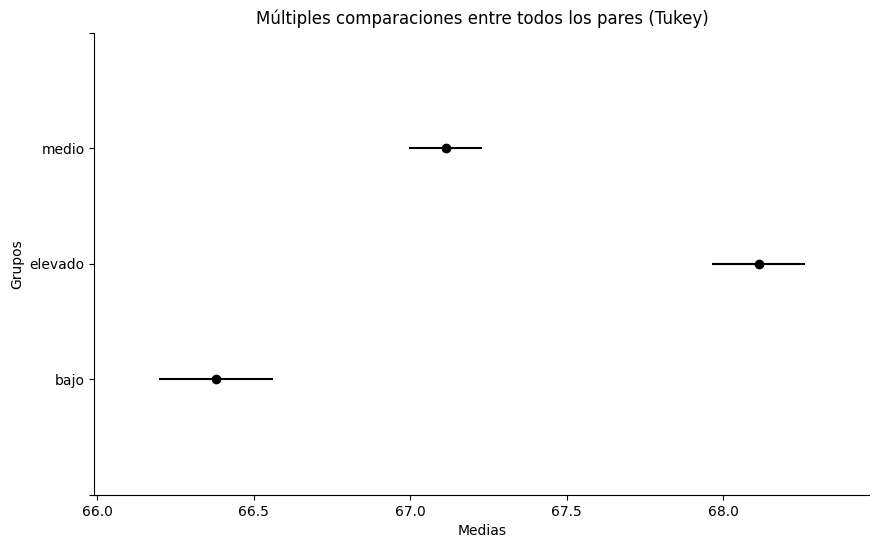

In [5]:
# Si todos los grupos tienen una distribución normal.
# Si no cumplen con la normalidad, toman el resultado de la prueba de Kruskal
#     y pueden usar los gráficos de Tukey para tomar una decisión (ignorando la tabla).
#.    Estrictamente hablando, tendrían que realizar la prueba de Dunn.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['participacion_parental'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey para la participacion parental muestra que hay diferencia en las calificaciones de los examenes de los alumnos de los que reciben un apoyo,  dependiendo si este es bajo, alto y medio.

In [6]:
df['horas_estudio'].unique()

array([23, 19, 24, 29, 25, 17, 21,  9, 10, 14, 22, 15, 12, 20, 11, 13, 16,
       18, 31,  8, 26, 28,  4, 35, 27, 33, 36, 43, 34,  1, 30,  7, 32,  6,
       38,  5,  3, 39,  2, 37, 44])

In [7]:
df['acceso_a_recursos'].unique()

array(['elevado', 'medio', 'bajo'], dtype=object)

In [8]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['acceso_a_recursos'] == 'bajo']['puntaje_examen'],
    df[df['acceso_a_recursos'] == 'medio']['puntaje_examen'],
    df[df['acceso_a_recursos'] == 'elevado']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 77.74
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


La prueba ANOVA aplicada al accseso de recursos de los padres muestra que si hay diferencia entre al menos dos tratamientos.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   bajo elevado   1.4212   0.0  1.1539  1.6885   True
   bajo   medio   0.6001   0.0  0.3157  0.8845   True
elevado   medio  -0.8211   0.0 -1.1309 -0.5113   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

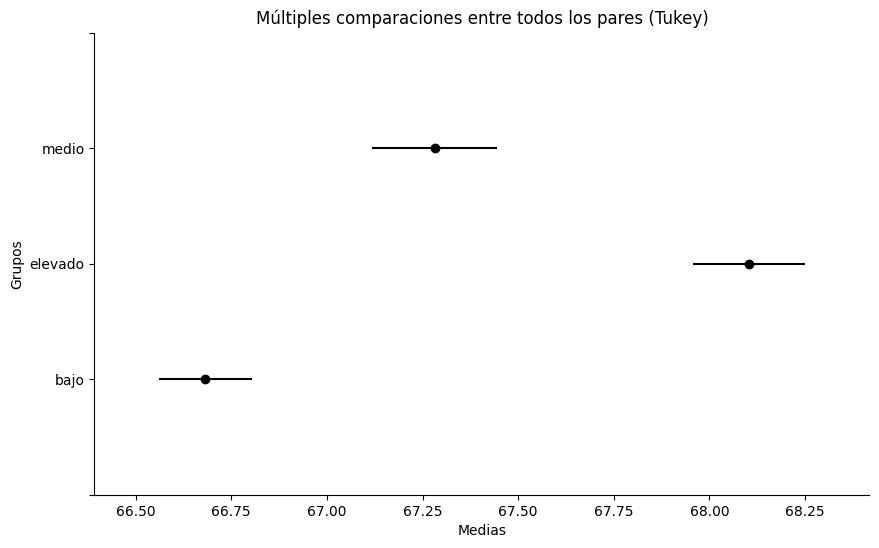

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['acceso_a_recursos'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey muestra que si hay diferencia en el accseso que tienen los alumnos, dependiendo si es elevado, medio o bajo, diferencias desde un punto hasta los casi dos puntos.

In [10]:
df['actividades_extracurriculares'].unique()

array(['no', 'si'], dtype=object)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no     si   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

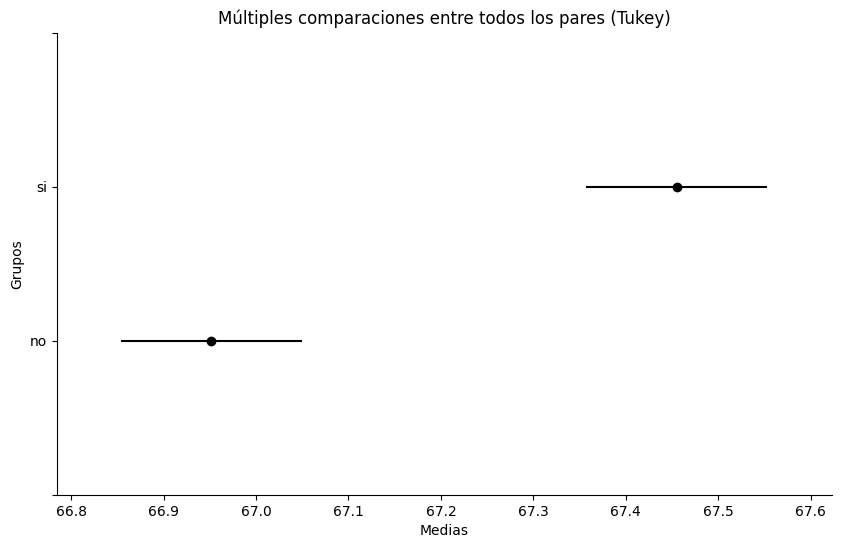

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['actividades_extracurriculares'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")



La prueba Tukey muestra que hay una diferencia significativa entre los alumnos que realizan actividades extracurriculares y los que no, aproximadamente con 0.5 de diferencia.

In [12]:
df['nivel_motivacion'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [13]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivel_motivacion'] == 'bajo']['puntaje_examen'],
    df[df['nivel_motivacion'] == 'medio']['puntaje_examen'],
    df[df['nivel_motivacion'] == 'elevado']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 25.54
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


La prueba ANOVA aplicada al nivel de motivacion muestra que si hay una diferencia entre al menos dos pruebas, aproximadamente de 0.6.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
   bajo elevado   0.9794    0.0  0.6474 1.3115   True
   bajo   medio   0.5744    0.0  0.3086 0.8402   True
elevado   medio   -0.405 0.0048 -0.7071 -0.103   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

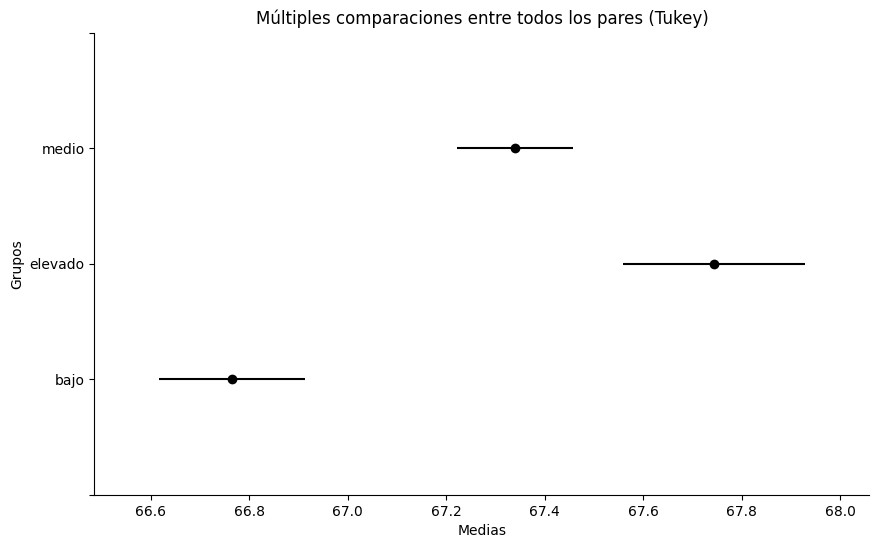

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['nivel_motivacion'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey muestra que hay una diferencia significativa entre los modelos de motivacion para cada alumno.

In [15]:
df['acceso_internet'].unique()

array(['si', 'no'], dtype=object)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no     si   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

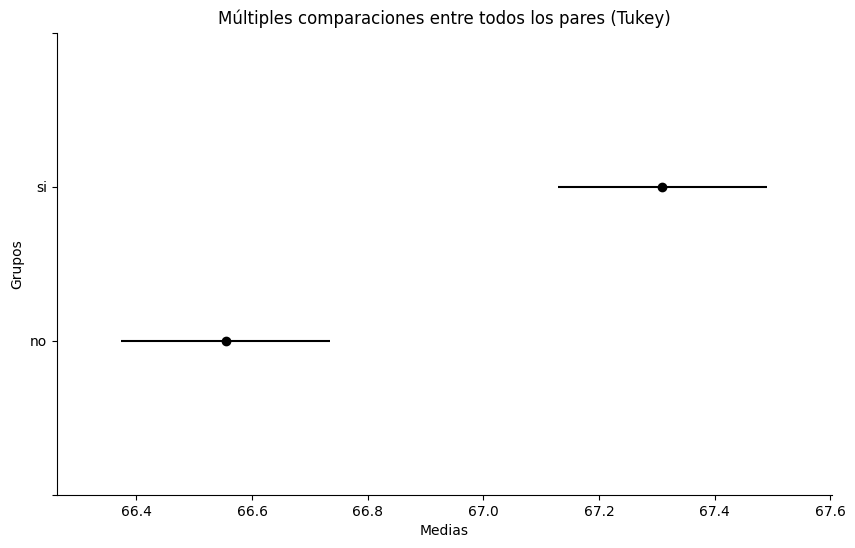

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['acceso_internet'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La pruebas Tukey muestra que si hay una diferencai entre los alumnos que tienen internet o no de casi un punto.

In [17]:

  df['ingreso_familiar'].unique()

array(['bajo', 'medio', 'elevado'], dtype=object)

In [18]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['ingreso_familiar'] == 'bajo']['puntaje_examen'],
    df[df['ingreso_familiar'] == 'medio']['puntaje_examen'],
    df[df['ingreso_familiar'] == 'elevado']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 28.78
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


La prueba ANOVA aplicada al ingreso familiar indica que si hay diferencia entre al menos dos pruebas.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   bajo elevado   0.9882    0.0  0.6717  1.3048   True
   bajo   medio   0.5178    0.0  0.2631  0.7725   True
elevado   medio  -0.4705 0.0015 -0.7873 -0.1536   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

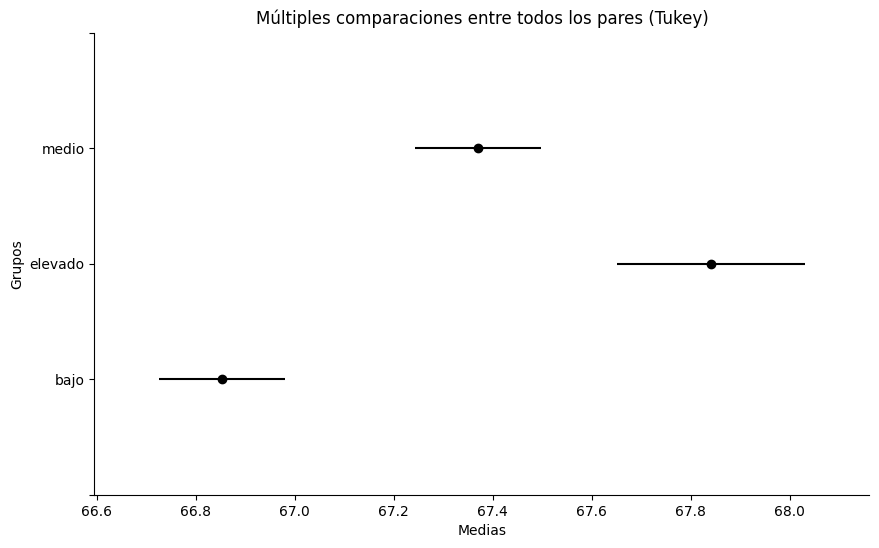

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['ingreso_familiar'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey muestra que hay una diferencia significativa entre el nivel bajo, medio y elevado de los ingresos de la familia para las calificaciones de los examenes.

In [20]:

  df['calidad_profesorado'].unique()

array(['medio', 'bajo', 'elevado'], dtype=object)

In [21]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['calidad_profesorado'] == 'bajo']['puntaje_examen'],
    df[df['calidad_profesorado'] == 'medio']['puntaje_examen'],
    df[df['calidad_profesorado'] == 'elevado']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 17.12
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


La prueba ANOVA muestra una diferencia entre al menos dos pruebas de la calidad del profesorado.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   bajo elevado   0.5447    0.0  0.2585  0.8309   True
   bajo   medio  -0.1345 0.4821 -0.4082  0.1392  False
elevado   medio  -0.6792    0.0 -0.9638 -0.3947   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

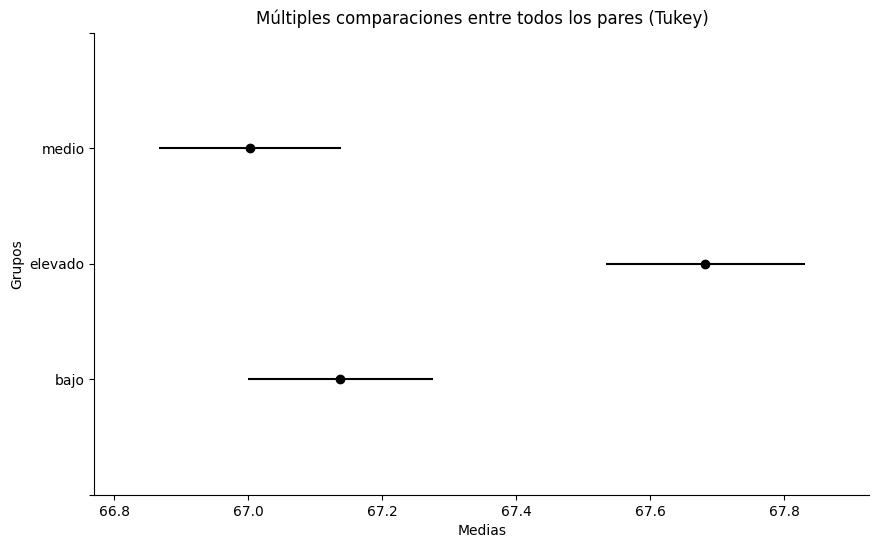

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['calidad_profesorado'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey muestra que si hay una diferencia entre las tres pruebas de la calidad del profesorado.

```
# This is formatted as code
```



In [23]:

  df['tipo_escuela'].unique()

array(['publico', 'privado'], dtype=object)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
privado publico  -0.0924 0.3855 -0.3011 0.1163  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

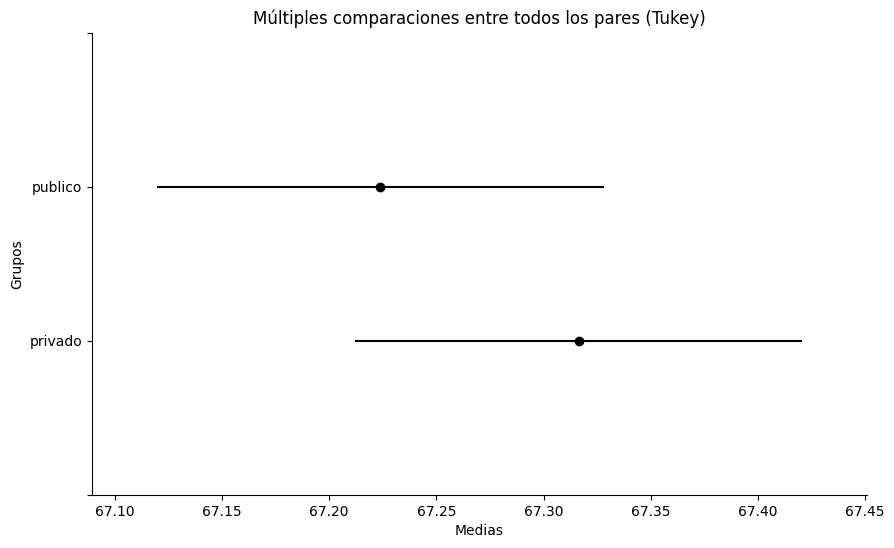

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['tipo_escuela'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Con la prueba Tukey se muestra que si hay una diferencia en las calificaciones de los examenes de las escuelas publicas y privadas, muy poca pero se encuentra.

In [25]:

df['influencia_companieros'].unique()

array(['positivo', 'negativo', 'neutral'], dtype=object)

In [26]:

  # Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['influencia_companieros'] == 'positivo']['puntaje_examen'],
    df[df['influencia_companieros'] == 'negativo']['puntaje_examen'],
    df[df['influencia_companieros'] == 'neutral']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 32.18
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


La prueba ANOVA aplicada para la influencia de los compañeros sugiere que si hay una diferencia entre al menos dos pruebas.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
negativo  neutral   0.6329    0.0 0.3229 0.9429   True
negativo positivo   1.0538    0.0  0.745 1.3626   True
 neutral positivo   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

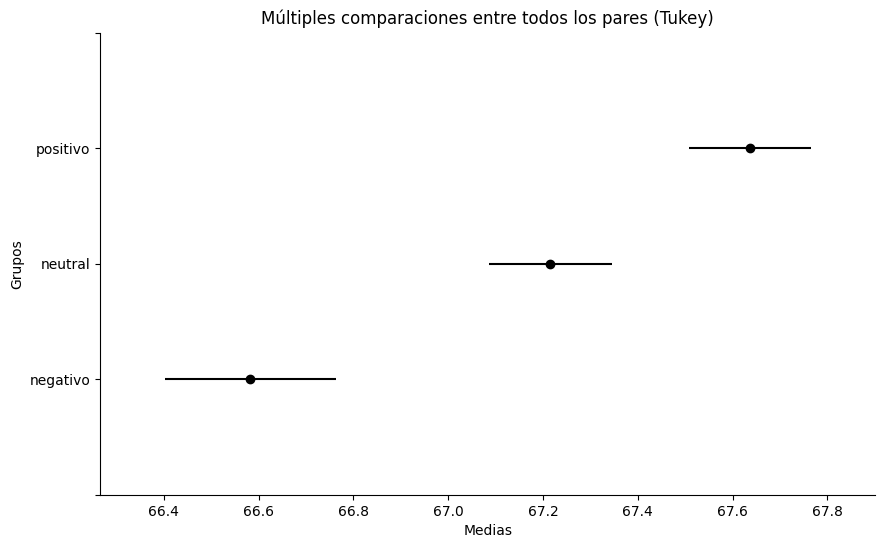

In [27]:
 from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['influencia_companieros'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey aplicada para la influencia de los compañeros muestra que si hay una diferencia significativa hasta de un punto entre la positiva y negativa.

In [28]:
df['nivel_estudio_padres'].unique()

array(['preparatoria', 'universidad', 'posgrado'], dtype=object)

In [29]:


  # Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivel_estudio_padres'] == 'preparatoria']['puntaje_examen'],
    df[df['nivel_estudio_padres'] == 'universidad']['puntaje_examen'],
    df[df['nivel_estudio_padres'] == 'posgrado']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 35.95
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


La prueba ANOVA aplicada para el nivel de estudio de los padres muestra que si hay una diferencia significativa entre al menos dos pruebas.

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
    posgrado preparatoria  -1.0778    0.0 -1.3801 -0.7754   True
    posgrado  universidad  -0.6142    0.0 -0.9429 -0.2856   True
preparatoria  universidad   0.4635 0.0001  0.2002  0.7268   True
----------------------------------------------------------------


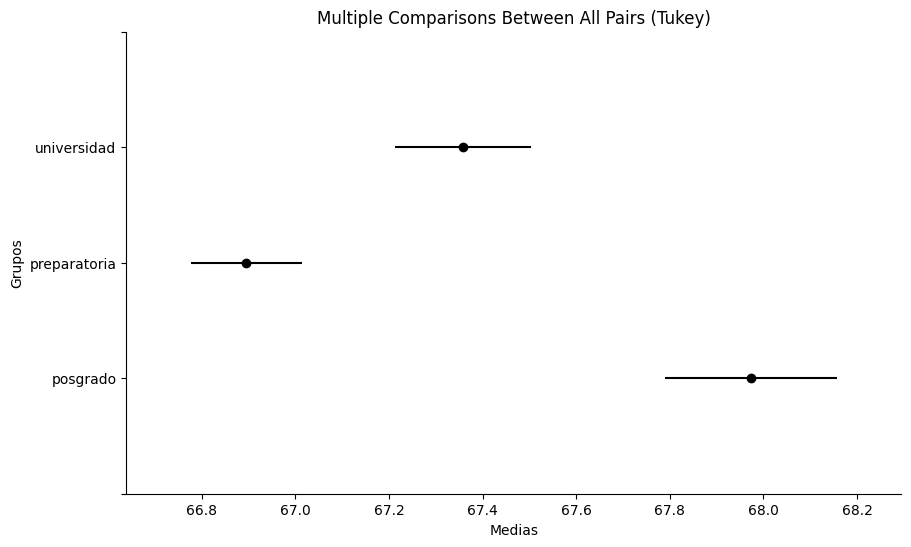

In [30]:
 from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['nivel_estudio_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior

La prueba Tukey muestra una diferencia aproximadamente de 0.5 puntos de los padres que estudiaron la preparatoria a la universidad y de mas de un punto para los que estudiaron preparatoria y posgrado, influyendo en las calificaciones de sus hijos.

In [31]:
df['discapacidad_aprendizaje'].unique()

array(['no', 'si'], dtype=object)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    no     si  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

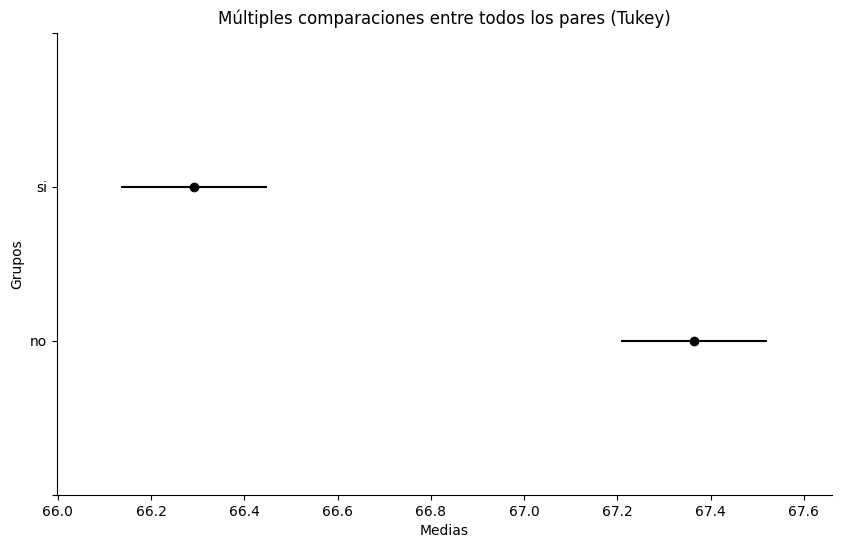

In [32]:
 from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['discapacidad_aprendizaje'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey aplicada a la discapacidad muestra que hay diferencia de casi un punto entre las calificaciones de un alumno que si tiene una discapacidad y uno que no.

In [33]:
df['distancia'].unique()

array(['cercano', 'moderado', 'lejano'], dtype=object)

In [34]:
  # Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['distancia'] == 'cercano']['puntaje_examen'],
    df[df['distancia'] == 'moderado']['puntaje_examen'],
    df[df['distancia'] == 'lejano']['puntaje_examen'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 24.94
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


La prueba ANOVA aplicada a la distancia muestra que si hay uan diferencia significativa entre al menos dos pruebas.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
cercano   lejano  -1.0154   0.0  -1.407 -0.6237   True
cercano moderado  -0.5272   0.0 -0.7822 -0.2722   True
 lejano moderado   0.4882 0.017  0.0705  0.9059   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

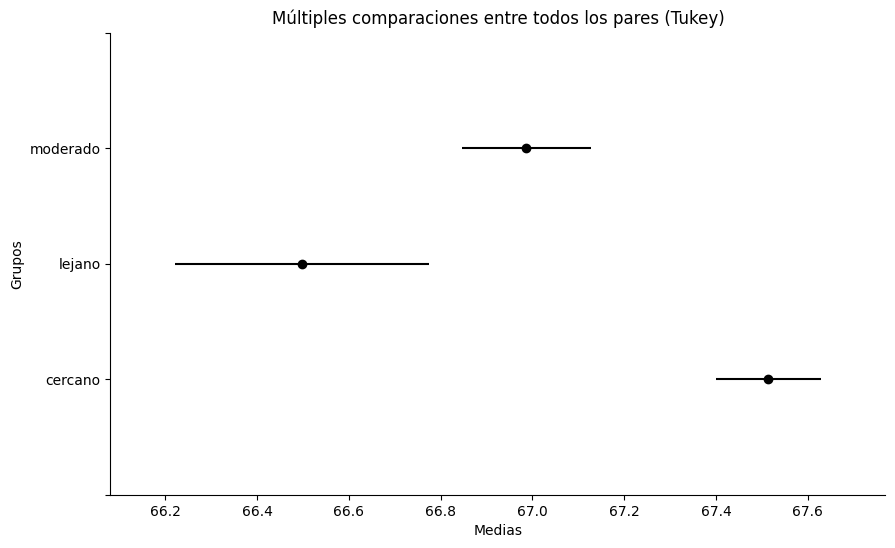

In [35]:
 from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['distancia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey muestra que los alumnos que viven mas lejos de la esceula tienen una desventaja contra los que no de casi un punto y una de aproximadamente 0.5 con los que viven medianamente cerca.

In [36]:
df['genero'].unique()

array(['hombre', 'mujer'], dtype=object)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
hombre  mujer   0.0391 0.6937 -0.1555 0.2337  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

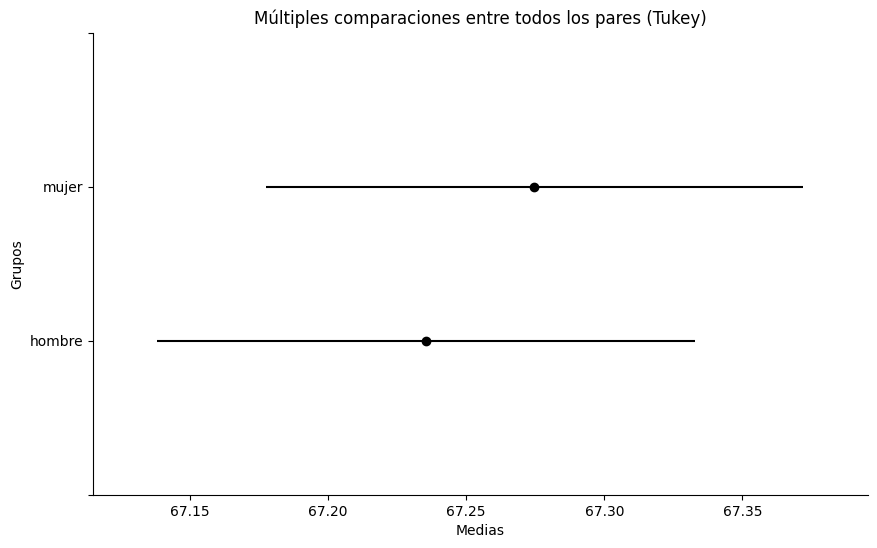

In [37]:
 from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['genero'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

La prueba Tukey muestra una diferencia aproximadamente de 0.3 puntos de los hombres y las mujeres en las calificaciones de los examenes.

**MARCO TEORICO**


ANOVA (Análisis de Varianza)
La prueba ANOVA o análisis de varianza es un método estadístico que permite descubrir si los resultados de una prueba son significativos, es decir, permiten determinar si es necesario rechazar la hipótesis nula o aceptar la hipótesis alternativa.
El ANOVA permite evaluar si existen diferencias significativas en las calificaciones finales (puntaje_examen) de los estudiantes en función de factores como:
- Participación Parental: Evaluar si la participación de los padres (baja, media, alta) impacta en las calificaciones.
- Acceso a Recursos: Analizar cómo la disponibilidad de recursos educativos (bajo, medio, alto) afecta el rendimiento académico.
- Tipo de Escuela: Comparar las calificaciones entre estudiantes de escuelas públicas y privadas.
Al aplicar ANOVA, se puede determinar si al menos uno de estos grupos presenta un rendimiento significativamente diferente en sus calificaciones.


Test de Tukey


El método de Tukey se utiliza en ANOVA para crear intervalos de confianza para todas las diferencias en parejas entre las medias de los niveles de los factores mientras controla la tasa de error por familia en un nivel especificado.
Si ANOVA indicó diferencias significativas, el test de Tukey se utiliza para identificar específicamente cuáles grupos difieren. Por ejemplo, después de encontrar que la participación parental afecta las calificaciones, el test de Tukey puede revelar si las calificaciones de los estudiantes con alta participación son significativamente diferentes de aquellos con baja participación.


**METODOLOGIA**
La metodología para analizar las calificaciones de exámenes de los estudiantes se centra en la aplicación del Análisis de Varianza (ANOVA) y el test de Tukey para identificar cómo diversas variables influyen en el rendimiento académico.

*1. Definición de Variables:*
Se seleccionarán las variables independientes que pueden afectar las calificaciones finales (puntaje examen), tales como:
- Horas de estudio
- Porcentaje de asistencia
- Participación parental (Baja, Media, Alta)
- Acceso a recursos (Bajo, Medio, Alto)
- Tipo de escuela (Pública, Privada)
- Nivel de motivación (Bajo, Medio, Alto)

*2. Recopilación de Datos:*
Se usó una base de datos proporcionada por el profesor Jose Cruz

*3. Análisis de Datos:*
- *ANOVA:* Se aplicará ANOVA para evaluar si existen diferencias significativas en las calificaciones finales entre los grupos definidos por las variables categóricas, como participación parental y tipo de escuela. Esto permitirá identificar si al menos un grupo presenta un rendimiento diferente.
  
- *Test de Tukey:* Si ANOVA indicó diferencias significativas, se utilizará el test de Tukey para realizar comparaciones múltiples entre los grupos, determinando específicamente cuáles son significativamente diferentes en sus calificaciones.

*4. Interpretación de Resultados:*
Los resultados del ANOVA y el test de Tukey se analizarán para extraer conclusiones sobre la influencia de las variables en el rendimiento académico. Se identificarán patrones que puedan servir para mejorar la enseñanza y el aprendizaje.

Esta metodología permite un análisis riguroso y estructurado del impacto de diferentes factores en las calificaciones de los exámenes, proporcionando información valiosa para la toma de decisiones educativas.


**CONCLUSION**


El análisis realizado revela que múltiples factores influyen significativamente en el rendimiento académico de los estudiantes, destacándose especialmente las dinámicas familiares, el acceso a recursos educativos, y características individuales como la motivación y las actividades extracurriculares.
Los estudiantes que cuentan con una alta participación parental tienden a obtener mejores calificaciones, lo que resalta la importancia de un entorno familiar comprometido. Asi mismo, el acceso a recursos educativos adecuados y a internet contribuye significativamente al desempeño académico, subrayando la necesidad de políticas que reduzcan la brecha digital y de recursos. Otro hallazgo relevante es que los estudiantes motivados y aquellos que participan en actividades extracurriculares muestran un mejor rendimiento, lo que sugiere que estas actividades no solo complementan la educación, sino que también fomentan habilidades clave como la disciplina y la gestión del tiempo.
El ingreso familiar y el nivel educativo de los padres también juegan un papel crucial, con un impacto positivo en las calificaciones cuando estos niveles son elevados. Esto evidencia la influencia del entorno socioeconómico en las oportunidades educativas y la necesidad de apoyar a estudiantes en situaciones vulnerables. Por otro lado, la distancia a la escuela y la influencia de los compañeros son factores importantes; vivir cerca de la escuela y estar rodeado de compañeros con actitudes positivas favorecen el rendimiento académico.
En contraste, no se encontraron diferencias significativas en las calificaciones de estudiantes de escuelas públicas y privadas, ni entre géneros, lo que sugiere que estos factores específicos no son determinantes en el contexto estudiado. Sin embargo, los estudiantes con discapacidades de aprendizaje presentan un desempeño más bajo, evidenciando la necesidad de enfoques pedagógicos más inclusivos y personalizados.
En resumen, el rendimiento académico es el resultado de una interacción compleja entre factores individuales, familiares y contextuales. Estos hallazgos subrayan la importancia de adoptar enfoques educativos integrales que incluyan el fortalecimiento del rol parental, la equidad en el acceso a recursos, el fomento de actividades extracurriculares y la implementación de apoyos específicos para estudiantes en condiciones desventajosas. De esta manera, se puede avanzar hacia una educación más inclusiva, equitativa y efectiva.
